##My simple tutorials on Monte Carlo Method/Simulations

In [137]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy.random import random

###Estimating Pi $\pi$

We will generate a bunch of inputs, analyze the outputs and estimate the value of $\pi$. How's this possible?  
Consider a square of length 2 with a unit circle inside. We generate random points inside the square. We assume that $ \frac{\mbox{number of points within the circle}}{\mbox{total number of points}} = \frac{\mbox{area(circle)}}{\mbox{area(square)}}$

Of course, this is not at all accurate if we take a few random points. But with sufficiently large sample size (or with enough repetitions and taking average), we will get a close approximation. So, what about $\pi$?

$ \frac{\mbox{area(circle)}}{\mbox{area(square)}} = \frac{\pi r^2}{l^2} = \frac{\pi}{4}$ for a unit circle and a square of length 2

Let's generate a dataframe of 1000 samples with randomized x and y values. 

In [138]:
df = pd.DataFrame({'x':random(1000),'y':random(1000)})

In [139]:
df.head()

,x,y
0,0.430613,0.502954
1,0.291225,0.189350
2,0.293353,0.839063
3,0.886400,0.718283
4,0.030788,0.707824


Now let's plot these random x and y values

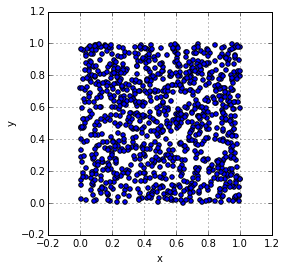

In [140]:
ax = df.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

For easier calculate, let's restrict these values between -1 and 1.

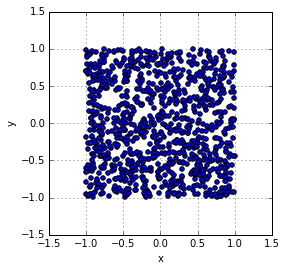

In [141]:
df2 = pd.DataFrame()
df2['x'] = 1 - 2 * df['x']
df2['y'] = 1 - 2 * df['y']
ax = df2.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

In [142]:
df2.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.024648,-0.035101
std,0.584686,0.584264
min,-0.998784,-0.996611
25%,-0.515035,-0.553246
50%,-0.025715,-0.080848
75%,0.491640,0.470558
max,0.998086,0.998909


Now let's find out the points that lie inside the unit circle.
i.e, points such that x^2 + y^2 < 1

In [143]:
# The truth values
(df2['x']**2 + df2['y']**2 < 1).head()

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [144]:
# Now we select these values and make a new dataframe
df_circle = df2[df2['x']**2 + df2['y']**2 < 1]

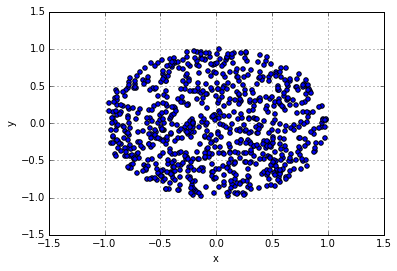

In [145]:
df_circle.plot(x='x',y='y',kind='scatter')

That doesn't quite look like a circle. Let's fix the aspect ratio

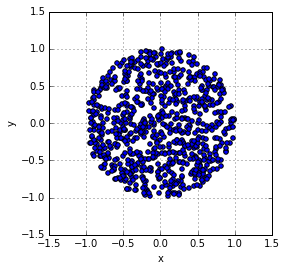

In [146]:
ax = df_circle.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

Much better!

Now, area of this circle is $\pi * 1^2$. Area of the square we plotted earlier is $2^2$. So, the ratio of the $ \frac{area of the circle}{area of the square} = \frac{\pi}{4}$

Let's see if we can estimate $\pi$ using Monte Carlo method. Let's divide the number of points in the circle from the total number of points.

In [147]:
print(len(df_circle))
print(len(df2))
print(len(df_circle)/len(df2))
print(4 * len(df_circle)/len(df2))

787
1000
0.787
3.148


This value is close to the actual value of pi, 3.14. Let's repeat the experiment with a lot more samples.

In [148]:
df_high = pd.DataFrame({'x':1-2*random(10000),'y':1-2*random(10000)})
df_high.head()

,x,y
0,-0.101726,0.004882
1,-0.791130,-0.507429
2,0.999078,-0.384921
3,-0.778304,0.802746
4,0.147055,0.507695


In [149]:
df_circle_high = df_high[df_high['x']**2 + df_high['y']**2 < 1]
print(4* len(df_circle_high)/len(df_high))

3.1472


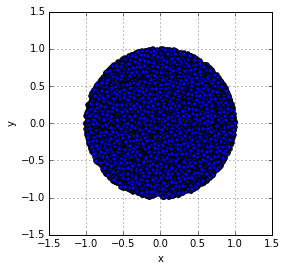

In [150]:
ax = df_circle_high.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

That looks great! And the approximation is closer to the actual value of $\pi$

###Estimating Coin Toss Probability

Let's create a list of samples, -1 for tail and +1 for head

[ 1 -1  1  1  1 -1 -1 -1  1 -1]


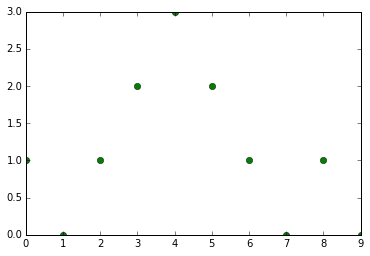

In [151]:
import math
import matplotlib.pyplot as plt

array = np.random.choice([-1,1],10000)
print(array[:10])
plt.plot(array[:10].cumsum(),'go')
plt.show()

Now let's estimate the probabilities of coin toss outcomes

In [152]:
from collections import Counter
counts = Counter(array)
print('Total Heads',counts[1])
print('Total Tails',counts[-1])
print('Final value',array.cumsum()[-1])
print('Probability of Heads', counts[1]/array.size)
print('Probability of Tails', counts[-1]/array.size)

Total Heads 4958
Total Tails 5042
Final value -84
Probability of Heads 0.4958
Probability of Tails 0.5042


This is close to the actual probability of 0.5

###Gambling Simulation

Now let's check our chances of winning a fair gamble. This is a variation of the coin toss experiment. But, we are only concerned with the final value and not the intermediate wins and losses. Do we still have a 50-50 chance of winning? To analyze this, we will repeat the test multiple times and take average in this case.

In [153]:
# Instead of using a for loop, let's create a 2D array, each row as a new repetition.
turns = np.random.choice([-1,1],[10,5])
print(turns)   # Individual wins and losses
array = turns.cumsum(axis=1)  
print(array)          # This array shows the actual gambling situations. 
                      # For each row (repetition), the values of each column 
                      # shows the current score. The last column value is the final score.

[[ 1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1]
 [ 1  1  1  1  1]
 [ 1  1 -1 -1 -1]
 [-1 -1  1  1 -1]
 [-1  1 -1  1 -1]
 [-1 -1  1 -1  1]
 [ 1  1 -1  1 -1]
 [ 1  1 -1  1 -1]
 [-1 -1 -1  1 -1]]
[[ 1  0 -1 -2 -3]
 [ 1  0  1  0 -1]
 [ 1  2  3  4  5]
 [ 1  2  1  0 -1]
 [-1 -2 -1  0 -1]
 [-1  0 -1  0 -1]
 [-1 -2 -1 -2 -1]
 [ 1  2  1  2  1]
 [ 1  2  1  2  1]
 [-1 -2 -3 -2 -3]]


In [154]:
final_scores = array[:,-1]
final_scores

array([-3, -1,  5, -1, -1, -1, -1,  1,  1, -3])

In [155]:
from collections import Counter
counts = Counter(final_scores>0)
print('wins',counts[True])
print('loss',counts[False])
print('chances of winning',counts[True]/(counts[True]+counts[False]))

wins 3
loss 7
chances of winning 0.3


Adding more repetitions, we get closer to actual probability. Thus, through Monte Carlo simulation, we approximate that we have a 50-50 chance of winning.

In [156]:
turns = np.random.choice([-1,1],[1000,5])
array = turns.cumsum(axis=1)  
final_scores = array[:,-1]
counts = Counter(final_scores>0)
print('wins',counts[True])
print('loss',counts[False])
print('chances of winning',counts[True]/(counts[True]+counts[False]))

wins 514
loss 486
chances of winning 0.514
